# Our Sun
We'll be using the module `sunpy` to work with data related to the sun.

# NotebookProblem Sun.0
## Working with `sunpy`
### AIA data
The Atmospheric Imaging Assembly (AIA) images the solar atmosphere in multiple wavelengths to link changes in the surface to interior changes. Data includes images of the Sun in 10 wavelengths every 10 seconds. 

The following example code displays a plot of a sample image from the solar atmosphere taken with AIA in 2011. Later we'll work with up to date data.

## Trouble shooting
If executing this code produces an error, make sure that you have run `pip3.5 install --user sunpy` from your bash console, and go to `Kernel->Restart` in the notebook menu.

https://sdo.gsfc.nasa.gov/mission/spaceweather.php

## Warnings
Note that some `sunpy` modules as used produce `RuntimeWarning`s in red. As long as they are `Warning`s and not errors, ignore for the purposes of this notebook.

In [ ]:
import sunpy
sunpy.data.download_sample_data()
from sunpy.data.sample import AIA_171_IMAGE
import sunpy.map
from matplotlib.pyplot import show
aiamap = sunpy.map.Map(AIA_171_IMAGE)
aiamap.plot()
show()

# NotebookProblem Sun.1
## Functions
The `sunpy` module gives us access to a variety of constants related to the sun. 

Two such are an astronomical unit (the average distance between the Sun and Earth), `au`, and the solar radius, `radius`. 

`au` and `radius` are both instances of objects custom to `sunpy` called `Constant`.  `Constants` are in [SI units by default](http://physics.nist.gov/cuu/Units/units.html), and when you print a constant you can see its unit and value.

`Constant` objects support a *method* `to` which takes as an argument a unit* and returns the value of the constant in the specified unit. For example, `radius.to('km')` converts radius to kilomenters.

1. Print `au` and `radius`
1. Create a function called `convert_to` that has a `Constant` as a parameter and a unit as a paramenter, and returns the `Constant` converted to the unit.
1. Uncomment the four lines in below your function definition in part 2) to call your function with arguments. What is the value of the distance from the Earth to the Sun in miles? Does it match the result that [Google gives you](https://www.google.com/search?q=one+astronomical+unit+in+miles)?
1. Display help information about `au`. What other methods are available for use?

*<sup>Units this can be specified as a string, for example 'km', or can be a `Unit` object from the `astropy.units` module such as `mile` from `astropy.units.imperial`.</sup>



In [ ]:
from sunpy.sun.constants import au, radius
from astropy.units.imperial import mile
# 1) Your print lines go here:

print(au)
print(radius)

# 2) Put your function definition here:

def convert_to(Constant, unit):
    return Constant.to(unit)

# # When your code in part 2) is ready, 
# # uncomment the following four lines and run the code:
print(convert_to(radius,"km").value)
print(convert_to(radius,mile).value)
print(convert_to(au,"lyr").value)
print(convert_to(au,mile).value)

# NotebookProblem Sun.2
## Variable Scoping
In this problem we are going to change the colormap of our solar sample image ([check out the a list of available colormaps]( http://matplotlib.org/examples/color/colormaps_reference.html)).

1. Read and Run the code. There's an error. Fix it by removing the line of code that is the problem.
1. Run the code again. Does the value of the variable `color` that is printed for the two function calls ever surprise you?
2. This code is much more complex than it nees to be. Fix it so that `colorful_sun("Purples")` and `colorful_sun("Greens")` display a purple and a green sun, respectively. 


In [ ]:
from matplotlib.pyplot import show
import matplotlib.cm as cm
from sunpy.data.sample import AIA_171_IMAGE
import sunpy.map

def colorful_sun(color):
    aiamap = sunpy.map.Map(AIA_171_IMAGE)
    aiamap.plot_settings['cmap'] = cm.get_cmap(color)
    aiamap.plot()
    show()
color='hsv'
colorful_sun(color)
colorful_sun("Purples")
colorful_sun("Greens")

# NotebookProblem Sun.3
## Tuples and Lists
### Querying the VSO (Virtual Solar Observatory)
> The VSO is a tool for investigating the physics of the Sun. Users may search existing databases for terrestrial and space-based observations, hiding the details of where the data is and what’s needed to get it. A researcher can use the VSO to search across multiple instruments and events, to find datasets of interest, and having done that, transparently download them to their workstation --[Sunpy Documentation](http://docs.sunpy.org/en/stable/guide/acquiring_data/vso.html)

### The Extreme ultraviolet Imaging Telescope (EIT) 
The Solar and Heliospheric Observatory (SOHO)'s Extreme ultraviolet Imaging Telescope (EIT) performed nearly 14 years of observations of the low corona from 1996 through 2010. 

## Accessing EIT data
1. Read the code, what is the code doing?
1. Run the code, what does it display?
1. Write a new function called `year_in_review` which takes a year as an argument and returns a list of lists of start tuples and stop time tuples corresponding a one hour time period (1-2) the first of every month of the year specified.
1. Use your `year_in_review` function and surround much of the code in a loop so that you can display an EIT image from every month of your chosen year. Run the code. Does it work? If not, use your debugging skills. Go to the debugging section of chapter 2 for tips.
1. Create a new function `months_in_review` which takes as an argument the beginning and ending month desired. Then, using the `year_in_review` function and *list slicing*, return just a list lists of the start and stop time tuples corresponding to the desired months. Check your results. 

Hint: if you write your `year_in_review` function in the right format, the following loop will work: `for start,stop in year_in_review(2004):`


In [ ]:
from sunpy.net import vso
#from sunpy.map.sources import EITMap
import sunpy.map
from matplotlib.pyplot import show
import glob
from os import remove
start_time=(2011, 9, 20, 1) # year, month, day, hour
stop_time=(2011, 9, 20, 2)

def year_in_review(year):
    startstop=[]
    for i in range(1, 13):
        startstop.append(((int(year), i, 1, 1), (int(year), i, 1, 2)))
    return startstop

# create a new VSOClient instance
client = vso.VSOClient()

# build our query
# 1) 

print(year_in_review(2014))

for start, stop in year_in_review(2014):
    result = client.query(
        vso.attrs.Time(start, stop),
        vso.attrs.Instrument('eit'))
    
    if result:
        # download matches, note that each time it will download a new file.
        res = client.get(result, path="{instrument}-{file}.fits").wait()
        # Maps any EIT results you have downloaded this session
        for eit_file in glob.glob("*.fits"):
            eitmap = sunpy.map.Map(eit_file)
            eitmap.plot()
            show()
            # Deletes the file since we are done with it
            #if '.fits' in eit_file: # Extra check that student doesn't change glob
            #    remove(eit_file) 
    


# NotebookProblem Sun.4
NOAA is the National Oceanic and Atmospheric Administration. We can access a variety of information about sunspots, radio flux, and geomagnetic activity on the sun. In this exercise we'll retreive current solar cycle data from NOAA and plot it vs. time so that we can see trends!
## Dictionary
We can access a dictionary\* object of this data using the *dot syntax* with `noaa.data`. 

1. First print the keys of `noaa.data` and execute your code.
1. Next uncomment the plot function below and insert some code to access the item corresponding to one of the keys that was printed. 
1. Once you have a plot, try plotting a few different keys by changing the code in 2. 
1. Finally, write a `for` loop to iterate over all possible keys and values and plot them all on the same plot.

\* <sub>This object isn't exactly a dictionary, but it can do everything a dictionary can and a few more things. Can you spot which method in the code below that isn't a dictionary method? We'll learn more about how this is done in the object oriented programming section next week.</sub>

In [ ]:
from matplotlib.pyplot import plot, show,legend
import sunpy.lightcurve as lc
from sunpy.data.sample import NOAAINDICES_LIGHTCURVE
# Current Solar Cycle Data
noaa = lc.NOAAIndicesLightCurve.create()

# 1. Print the keys of noaa.data  here:
for key in noaa.data.keys():
    print(key)
## 2. Change INSERT_CODE to be an item corresponding 
##    to one of the data's keys printed in part A). 
##    Then uncomment and run:
plot(noaa.data.index, noaa.data['sunspot ratio']) # uncomment this when you are done

# 3. Put a for loop before the plot code to plot every possible data set.
for key in noaa.data.keys():
    plot(noaa.data.index, noaa.data[key])

show()


# NotebookProblem Sun.5
## Numpy arrays
### Lightcurve
> `SunPy` handles time series data, fundamental to the study of any real world phenomenon, by creating a lightcurve object. A lightcurve consists of two parts; times and measurements taken at those times. The data can either be in your current Python session, alternatively within a local or remote file. Let’s create some fake data and pass it into a lightcurve object. --[Sunpy Documentation](http://sunpy.org/)

1. Read and run the code. What does it do?
1. Create a new numpy array called `cos_signal` that instead of a `sin` uses a `cos`. Use this to create a new `LightCurve` with a new name, following the example in the code. Plot your signal as in the example code below.
1. Create a new numpy array called `test_signal` equal to `sin_signal` squared plus `cos_signal` squared.  Use this to create a new `LightCurve` with a new name, following the example in the code. Plot your signal as in the example code below.
1. Create a new array called `sin_plusone_signal` equal to `sin_signal` plus one. Then use *array slicing* to create a new light curve where the signal is only half the amount of time as the other signals. Your light curve should depend on `sin_plusone_signal` and `times`, and you should ensure they are of equal length.

In [ ]:
import numpy as np
import sunpy.data.sample
from sunpy.lightcurve import LightCurve
from matplotlib.pyplot import ylim, show

times = np.arange(1000)*2  # the x-axis of our plot

# 1) sin_signal, three lines which create signal, light curve, and plot
# Run the code to see the plot
sin_signal = np.sin(np.arange(1000)*0.02) # the y-axis of our plot.
sin_light_curve = LightCurve.create({"sin": sin_signal},index = times)
sin_light_curve.plot()

# 2) cos_signal, your code should be three lines as above
cos_signal = np.cos(np.arange(1000)*0.02)
cos_light_curve = LightCurve.create({"cos": cos_signal}, index = times)
cos_light_curve.plot()

# 3) test_signal, your code should be three lines as above
test_signal = sin_signal**2 + cos_signal**2
test_light_curve = LightCurve.create({"test": test_signal}, index = times)
test_light_curve.plot()

# 4) sin_plusone_signal, your code should be three lines as above
sin_plusone_signal = np.sin(np.arange(1000)*0.01) + 1
sin_plusone_signal = LightCurve.create({"sinplusone": sin_plusone_signal},index = times[0: 1000]*0.5)
sin_plusone_signal.plot()


# This code makes sure we can see all the signals and shows the plot
ylim([-2,2])
show()

# NotebookProblem Sun.6
## Matplotlib

### Geostationary Operational Environmental Satellites (GOES )
GOES satellites all carry on board the Space Environment Monitor (SEM) instrument subsystem which has provided magnetometer, energetic particle, and soft X-ray data continuously since July 1974.

On each GOES satellite there are two X-ray Sensors (XRS) which provide solar X ray fluxes for the wavelength bands of 0.5 to 4 Å (short channel, known as XRS-A) and 1 to 8 Å (long channel, known as XRS-B). 

This data is accessible through `GOESLightCurve` in the `sunpy.lightcurve` module. The data goes back to 1981. That's even before *I* was born. 

### The Heliophysics Event Knowledgebase (HEK)
HEK information about solar flares and solar events automatically detected or detected by humans. The NOAA Space Weather Prediction Center (SWPC) data is available from the HEK.
#### Flare Classes
> The biggest solar flares are known as "X-class flares" based on a classification system that divides solar flares according to their strength. The smallest ones are A-class (near background levels), followed by B, C, M and X. Similar to the Richter scale for earthquakes, each letter represents a 10-fold increase in energy output. So an X is ten times an M and 100 times a C. Within each letter class there is a finer scale from 1 to 9. --[NASA](https://www.nasa.gov/mission_pages/sunearth/news/X-class-flares.html)

## Space Environment from GOES vs. Space Weather Predictions
In this problem we will combine solar X-ray flux data from GOES' sensors with NOAA's space weather observations from the SWPC. This problem has a lot of parts. Take it one step at a time.
1. Read the code and try to figure out what is going on
1. Run the code and read the plot it produces. How did the space predictions do against the data from the real flares with GOES?
1. Comment out the plt.legend line. What happens? Comment it back in.
1. Change the legend by creating a more descriptive name for the solar flares, instead of A, B, C, M or X followed by a number as output by `flare.get('fl_goescls')`, change the names to 'tiny', 'small', 'medium', 'big', and 'huge'. 
1. Change the `loc` from `2` to `1`, `3`, or `4`. What happens?
1. Give the plot a title with the function `plt.title` which takes one argument: the title of the plot. The title should incorporate information about the date the plot is of.
1. Give the x-axis a descriptive label with the function `plt.xaxis` which takes one argument: the name of the x-axis.
1. Replace the plt.axvspan line with ``` plt.axvspan(parse_time(flare.get('event_starttime')),parse_time(flare.get('event_endtime')),alpha=0.2, label=flare.get('fl_goescls'),color="yellow")```. Now change color to "red", "green","blue",and "purple". What happens?
1. Depending on the class of the flare, make this color different, in rainbow order from small to big flares.
1. Try a different year for your plot (for example 2016). What does it look like?

* Hint: you can test if a letter is or is not in a string by using the `in` or `not in` operators. For example: `"a" in "Camel"`, `"a" not in "Camel"`.

/home/123tshi2/.local/lib/python3.5/site-packages/sunpy/lightcurve/lightcurve.py:299: RuntimeWarning: Using existing file rather than downloading, use overwrite=True to override.
  "overwrite=True to override.", RuntimeWarning)


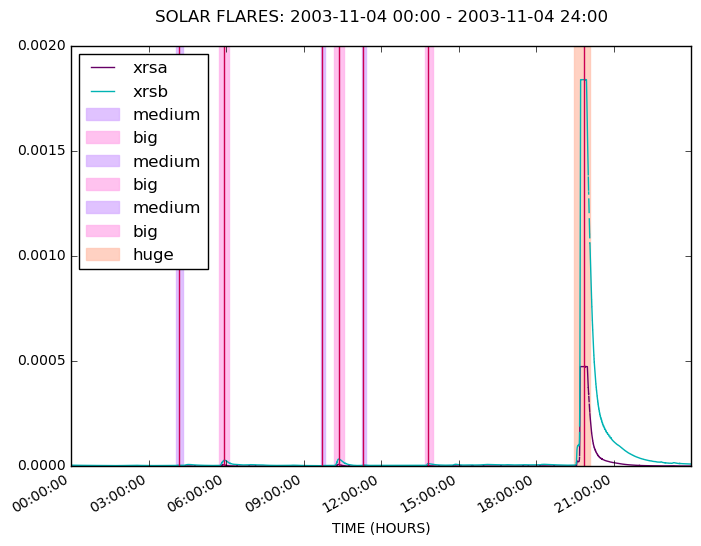

In [2]:
import matplotlib.pyplot as plt
from sunpy.lightcurve import GOESLightCurve
from sunpy.time import TimeRange, parse_time
from sunpy.net import hek

# Getting GOES XRS data for a particular time of interest:
start = '2003-11-04 00:00'
end = '2003-11-04 24:00'
tr = TimeRange([start, end])
goes = GOESLightCurve.create(tr)

# Getting the HEK data for this time from the NOAA Space Weather Prediction Center (SWPC)
client = hek.HEKClient()
flares_hek = client.query(hek.attrs.Time(tr.start,tr.end), hek.attrs.FL, hek.attrs.FRM.Name == 'SWPC')
 
# Plotting the data
# This plots XRS-A and XRS-B for us:

goes.plot(color=('#660066', "#00b3b3"), figsize=(8, 6))

# This plots the SWPC results

labellist = ["A","B","C","M","X"]
namelist = ['tiny', 'small', 'medium', 'big', 'huge']
colorlist = ['#b3ffb3', '#b3ecff', '#d9b3ff', '#ffb3ec', '#ffc6b3']

for flare in flares_hek:
    plt.axvline(parse_time(flare.get('event_peaktime')), color="#cc0052")
    
    for i in range(5):
        if labellist[i] in flare.get('fl_goescls'):
            name = namelist[i]
            flarecolor = colorlist[i]
            
    plt.axvspan(parse_time(flare.get('event_starttime')), parse_time(flare.get('event_endtime')),
            alpha=0.8, label=name, color=flarecolor)

plt.title('SOLAR FLARES: ' + start + " - " + end + "\n")
plt.xlabel('TIME (HOURS)')
plt.legend(loc=2)
plt.show()

Capstone. Sun.A One more year around the sun
Capstone.Sun.A.1 Your birthday star
Pick your last birthday and see what the sun was doing on that day! When your next birthday comes up you can compare.
Capstone.Sun.A.2 Make a beautiful solar image
Go back to NotebookProblem Sun.3. Change the code to cache the images (that is not delete them) after they are fetched. There should be four images for each start,end date pair. Use the loading code from NotebookProblem Sun.3 to load in and view these files without fetching them again.
Now convert these images to greyscale. Pick three of the four images, and assigning each image a color (Red, Green or Blue), and the amount of that color proportional to the percentage grey of a pixel. Now add the three images and display a RGB (red green blue) image.
Try adding one image in at a time. You can always tweak how you decide to combine the images. What happens when you switch the images you have selected?
Capstone.Sun.A.3 Your beautiful birthday star
Make a beautiful image of the sun on your last birthday. Share it with a friend!
Capstone.Sun.A.4 Find solar events
1.Search a variety of data sources that we have used within this Notebook. Which events happened on your last birthday? Where are we in the 11 year solar cycle?
Capstone.Sun.B Flares and CMEs
Read more about flares and CMEs (Coronal Mass Ejections). Read about the different classes of flares.
Capstone.Sun.B.1 Flare image
Find an X class solar flare. Display an image of the sun from the time period of the flare. Can you see where it came from?
Capstone.Sun.B.2 CME image
Find a CME. Display an image of the sun from the time period of the CME. Can you find an image which depicts it?
Capstone.Sun.B.3 Flare and CME detector
One you have an image of a flare or a CME, try to detect it in code.
Try to make a simple algorithm, such as the one to detect clouds in the previous Notebook Chapter1_Earth.ipynb
Try to make a more advanced algorithm, such as a Hough Line Transform. You might need to install some additional modules with pip. http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html
Compare your two detection algorithms with http://docs.sunpy.org/en/stable/generated/gallery/gallery/overhek_polygon.html#sphx-glr-generated-gallery-gallery-overhek-polygon-py by plotting the outline of all three on a sun image
If you were able to make a successful algorithm, see if you can search images. Can you ever find one where you detect an event and no one else seemed to?

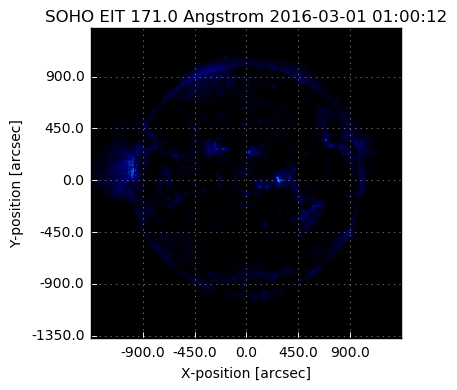

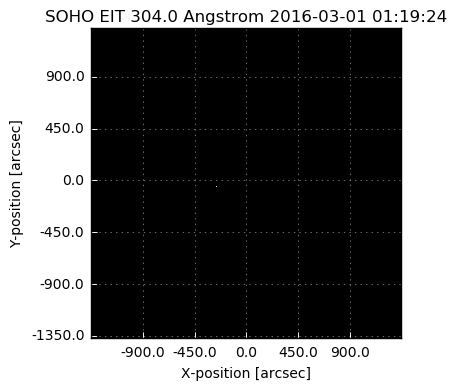

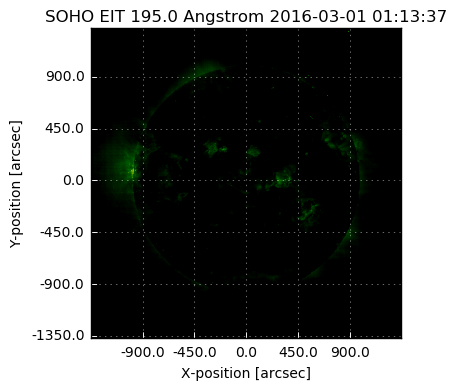

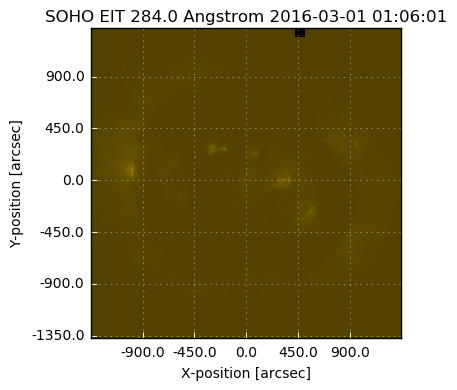

In [5]:
#capstone A.1

from sunpy.net import vso
#from sunpy.map.sources import EITMap
import sunpy.map
from matplotlib.pyplot import show
import glob
from os import remove
start_time=(2011, 9, 20, 1) # year, month, day, hour
stop_time=(2011, 9, 20, 2)


# create a new VSOClient instance
client = vso.VSOClient()
# build our query
# 1) 
result = client.query(
    vso.attrs.Time((2016, 3, 1, 1), (2016, 3, 1, 2)),
    vso.attrs.Instrument('eit'))
    
if result:
    # download matches, note that each time it will download a new file.
    res = client.get(result, path="{instrument}-{file}.fits").wait()
    # Maps any EIT results you have downloaded this session
    for eit_file in glob.glob("*.fits"):
        eitmap = sunpy.map.Map(eit_file)
        eitmap.plot()
        show()
        # Deletes the file since we are done with it
        #if '.fits' in eit_file: # Extra check that student doesn't change glob
        #    remove(eit_file)

In [1]:
#!!!!!!!!!!!!!!!!!FOR SOME REASON THIS DOESNT WORK ON PYTHONANYYWHERE BUT IT DOES ON JUPYTER SORRY!!!!!!!!!!!!!!!!!!

#capstone A.2
from sunpy.net import vso
import sunpy.map
from PIL import Image
#from matplotlib.pyplot import show
import glob
from os import remove
import numpy as np

def year_in_review(year):  #A function which defines year_in_review and has year as a parameter
    startstop=[] #starts counting
    for i in range(1, 13): #the range must be in between 1 and 13 
        startstop.append(((int(year), i, 1, 1), (int(year), i, 1, 2))) #i is the month and the month is in between 1 and 13
    return startstop #returns start stop to count again 

client = vso.VSOClient()

#print(year_in_review(2014))

tuplearr = np.zeros((1024, 1024, 3), 'uint8')   #tuplearr is a variable which is equal to a tuple np.zeros
counter = 0 #counter is set to 0

for eit_file in glob.glob("*.fits"):  #for loop with eit_file as the variable and glob.golb as the sequence
    if ".0.fits" not in eit_file and ("EIT-efz20140601.010014.fits" in eit_file or "EIT-efz20140201.010013.fits" in eit_file
                                      or "EIT-efz20141001.010013.fits" in eit_file):
        #file name corresponds to date
        eitmap = sunpy.map.Map(eit_file) #eitmap equals sunpy.map
        eitmap.plot() #plots eitmap
        eitmaparr=eitmap.data #eitmaparr and eitmap.data equal eachother. 
        eitmapscale = np.uint8(eitmaparr/10)
        #eitmapscale = eitmaparr/10
        print(eitmapscale)
        
        #if counter == 0:
        #    eitmapscale = eitmapscale*0.90
        
        if counter <= 2:
            tuplearr[..., counter] = np.uint8(eitmapscale*1)
    
        counter += 1
        print(counter)

img2 = Image.fromarray(tuplearr)
img2.save("rgbtest5.png")
        